<a href="https://colab.research.google.com/github/viniciusriosfuck/python-financas/blob/main/Python_para_finan%C3%A7as_aloca%C3%A7%C3%A3o_e_otimiza%C3%A7%C3%A3o_de_portf%C3%B3lios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python para finanças - alocação e otimização de portfólios

## Importação das bibliotecas e base de dados

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
import pandas as pd
from pandas_datareader import data

acoes = ['GOLL4.SA', 'CVCB3.SA', 'WEGE3.SA', 'MGLU3.SA', 'TOTS3.SA', 'BOVA11.SA']
acoes_df = pd.DataFrame()
for acao in acoes:
  acoes_df[acao] = data.DataReader(acao, data_source='yahoo', start='2015-01-01')['Close']

acoes_df = acoes_df.rename(columns={'GOLL4.SA': 'GOL', 'CVCB3.SA': 'CVC', 'WEGE3.SA': 'WEGE',
                                    'MGLU3.SA': 'MGLU', 'TOTS3.SA': 'TOTS', 'BOVA11.SA': 'BOVA'})

acoes_df.dropna(inplace=True)
acoes_df.to_csv('acoes.csv')

dataset_raw = pd.read_csv('acoes.csv')

days_bolsa = 246


In [ ]:
dataset = pd.read_csv('acoes.csv')
dataset

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02,14.990000,15.200000,11.846153,0.232812,11.910702,47.259998
1,2015-01-05,14.850000,15.000000,11.926923,0.237187,11.544731,46.320000
2,2015-01-06,15.210000,14.800000,11.750000,0.234062,10.822770,46.580002
3,2015-01-07,14.550000,14.670000,11.615384,0.241875,10.746248,48.150002
4,2015-01-08,14.270000,14.150000,11.811538,0.240000,10.995774,48.509998
...,...,...,...,...,...,...,...
1498,2021-01-22,22.670000,18.370001,88.260002,26.000000,30.150000,113.180000
1499,2021-01-26,22.209999,17.440001,88.949997,25.750000,30.110001,112.970001
1500,2021-01-27,23.030001,18.020000,88.690002,25.790001,28.740000,112.970001
1501,2021-01-28,24.610001,19.240000,87.970001,26.190001,29.459999,113.910004


## Alocação aleatória de ativos

In [ ]:
dataset.loc[len(dataset) - 1]['BOVA']

110.55999755859376

## Em soma valor não está descontado o investimento inicial

In [ ]:
def alocacao_ativos(dataset, dinheiro_total, seed = 0, melhores_pesos = []):
  dataset = dataset.copy()

  if seed != 0:
    np.random.seed(seed)

  if len(melhores_pesos) > 0:
    pesos = melhores_pesos
  else:  
    pesos = np.random.random(len(dataset.columns) - 1)
    #print(pesos, pesos.sum())
    pesos = pesos / pesos.sum()
    assert pesos.sum() == 1.0
    #print(pesos, pesos.sum())

  colunas = dataset.columns[1:]
  #print(colunas)
#   dataset.iloc[:,1:] /= dataset.iloc[0,1:]
  dataset[colunas] /= dataset[colunas].iloc[0]
#   for i in colunas:
#     dataset[i] = (dataset[i] / dataset[i][0])

  for i, acao in enumerate(colunas):
    #print(i, acao)
    dataset[acao] = dataset[acao] * pesos[i] * dinheiro_total
  
  dataset['soma valor'] = dataset.sum(axis = 1)
  dataset['Date'] = pd.to_datetime(dataset['Date'])

  datas = dataset['Date']
  #print(datas)

  dataset.drop(columns=['Date'], inplace = True)
  dataset['taxa retorno'] = 0.0

  for i in range(1, len(dataset)):
    dataset['taxa retorno'][i] = ((dataset['soma valor'][i] / dataset['soma valor'][i - 1]) - 1) * 100

  acoes_pesos = pd.DataFrame(data = {'Ações': colunas, 'Pesos': pesos * 100})

  return dataset, datas, acoes_pesos, dataset.loc[len(dataset)-1]['soma valor']

In [ ]:
investimento_inicial = 5000
dataset, datas, acoes_pesos, soma_valor = alocacao_ativos(pd.read_csv('acoes.csv'), investimento_inicial, 10)

In [ ]:
dataset

,GOL,CVC,WEGE,MGLU,TOTS,BOVA,soma valor,taxa retorno
0,1330.859777,35.806036,1093.315674,1292.008683,860.138954,387.870876,5000.000000,0.000000
1,1318.430187,35.334904,1100.770128,1316.288069,833.710152,380.156147,4984.689587,-0.306208
2,1350.392100,34.863773,1084.441412,1298.945650,781.573275,382.290029,4932.506238,-1.046873
3,1291.795217,34.557537,1072.017322,1342.304468,776.047198,395.175284,4911.897027,-0.417824
4,1266.935952,33.332592,1090.120908,1331.899017,794.066880,398.129839,4914.485188,0.052692
...,...,...,...,...,...,...,...,...
1498,2012.714591,43.273482,8145.770327,144289.063370,2177.301529,928.887588,157597.010887,1.871260
1499,1971.874242,41.082717,8209.451939,142901.668530,2174.412975,927.164090,156225.654494,-0.870166
1500,2044.676588,42.449000,8185.456296,143123.656786,2075.477487,927.164090,156398.880246,0.110882
1501,2184.953998,45.322903,8119.005305,145343.486413,2127.472699,934.878851,158755.120169,1.506558


In [ ]:
datas

0      2015-01-02
1      2015-01-05
2      2015-01-06
3      2015-01-07
4      2015-01-08
          ...    
1498   2021-01-22
1499   2021-01-26
1500   2021-01-27
1501   2021-01-28
1502   2021-01-29
Name: Date, Length: 1503, dtype: datetime64[ns]

In [ ]:
acoes_pesos

,Ações,Pesos
0,GOL,26.617196
1,CVC,0.716121
2,WEGE,21.866313
3,MGLU,25.840174
4,TOTS,17.202779
5,BOVA,7.757418


In [ ]:
soma_valor

154933.76492092293

## Visualização dos dados

In [ ]:
fig = px.line(x=datas, y=dataset['taxa retorno'], title='Retorno diário do portfólio')
fig.show()

In [ ]:
fig = px.line(title='Evolução do patrimônio')
for i in dataset.drop(columns=['soma valor', 'taxa retorno']).columns:
  fig.add_scatter(x=datas, y=dataset[i], name=i)
fig.show()

In [ ]:
fig = px.line(x=datas, y=dataset['soma valor'], title='Evolução do patrimônio')
fig.show()

## Mais cálculos no portfólio

### Retorno acumulado em todo o período

In [ ]:
dataset.loc[len(dataset) - 1]['soma valor'] / dataset.loc[0]['soma valor'] - 1

29.986752984184587

### Desvio padrão: risco

In [ ]:
dataset['taxa retorno'].std()

2.799617079665568

### Sharpe ratio

$$ S = \frac{R_p-R_f}{\sigma_p} $$
* S>1: aceitável
* S>2: muito bom
* S>3: excelente

Retorno do investimento vs risco
* $R_p$: retorno portfólio (esperança)
* $R_f$: retorno free
* $\sigma_p$: desvio padrão do portfólio




In [ ]:
(dataset['taxa retorno'].mean() / dataset['taxa retorno'].std()) * np.sqrt(days_bolsa)

1.5011972901768826

In [ ]:
# investimento_inicial = 5000
# Lucro
soma_valor - investimento_inicial

149933.76492092293

In [ ]:
# Taxa selic: https://www.infomoney.com.br/guias/taxa-selic/
selic = {
    "2015": 12.75,
    "2016": 14.25,
    "2017": 12.25,
    "2018": 6.5,
    "2019": 5.0,
    "2020": 2.0
    }
montante = {}
valor_ref = investimento_inicial
for ano in selic.keys():
    montante[ano] = valor_ref*(1+selic[ano]/100)
    valor_ref = montante[ano]
montante 

{'2015': 5637.5,
 '2016': 6440.84375,
 '2017': 7229.847109375,
 '2018': 7699.787171484375,
 '2019': 8084.776530058594,
 '2020': 8246.472060659766}

In [ ]:
rendimentos = montante['2020'] - investimento_inicial
rendimentos

3246.4720606597657

In [ ]:
ir = rendimentos * 15 / 100
ir

486.9708090989648

In [ ]:
rendimentos - ir

2759.501251560801

In [ ]:
taxa_selic_historico = np.array(list(selic.values()))
taxa_selic_historico.mean() / 100

0.08791666666666666

In [ ]:
(dataset['taxa retorno'].mean() - taxa_selic_historico.mean() / 100) / dataset['taxa retorno'].std() * np.sqrt(days_bolsa)

1.0086588476187113

## Otimização de portfólio - randômico

- Markowitz: https://pt.wikipedia.org/wiki/Teoria_moderna_do_portf%C3%B3lio

In [ ]:
import sys
1 - sys.maxsize

-9223372036854775806

In [ ]:
def alocacao_portfolio(dataset, dinheiro_total, sem_risco, repeticoes):
  dataset = dataset.copy()
  dataset_original = dataset.copy()

  lista_retorno_esperado = []
  lista_volatilidade_esperada = []
  lista_sharpe_ratio = []

  melhor_sharpe_ratio = 1 - sys.maxsize
  melhores_pesos = np.empty
  melhor_volatilidade = 0
  melhor_retorno = 0
  
  for _ in range(repeticoes):
    pesos = np.random.random(len(dataset.columns) - 1)
    pesos = pesos / pesos.sum()

    for i in dataset.columns[1:]:
      dataset[i] /= dataset[i][0]

    for i, acao in enumerate(dataset.columns[1:]):
      dataset[acao] = dataset[acao] * pesos[i] * dinheiro_total

    dataset.drop(columns=['Date'], inplace=True)

    retorno_carteira = np.log(dataset / dataset.shift(1))
    matriz_covariancia = retorno_carteira.cov()

    dataset['soma valor'] = dataset.sum(axis = 1)
    dataset['taxa retorno'] = 0.0

    for i in range(1, len(dataset)):
      dataset['taxa retorno'][i] = np.log(dataset['soma valor'][i] / dataset['soma valor'][i - 1])

    #sharpe_ratio = (dataset['taxa retorno'].mean() - sem_risco) / dataset['taxa retorno'].std() * np.sqrt(246)
    retorno_esperado = np.sum(dataset['taxa retorno'].mean()*pesos)*days_bolsa
    volatilidade_esperada = np.sqrt(np.dot(pesos, np.dot(matriz_covariancia*days_bolsa, pesos)))
    sharpe_ratio = (retorno_esperado - sem_risco) / volatilidade_esperada

    if sharpe_ratio > melhor_sharpe_ratio:
      melhor_sharpe_ratio = sharpe_ratio
      melhores_pesos = pesos
      melhor_volatilidade = volatilidade_esperada
      melhor_retorno = retorno_esperado

    lista_retorno_esperado.append(retorno_esperado)
    lista_volatilidade_esperada.append(volatilidade_esperada)
    lista_sharpe_ratio.append(sharpe_ratio)
    
    dataset = dataset_original.copy()

  return melhor_sharpe_ratio, melhores_pesos, lista_retorno_esperado, lista_volatilidade_esperada, lista_sharpe_ratio, melhor_volatilidade, melhor_retorno

In [ ]:
%%time
(sharpe_ratio, melhores_pesos, ls_retorno, ls_volatilidade, ls_sharpe_ratio, 
 melhor_volatilidade, melhor_retorno) = alocacao_portfolio(
     pd.read_csv('acoes.csv'), 
     investimento_inicial, 
     taxa_selic_historico.mean()/100, 
     repeticoes=100
     )

CPU times: user 12.1 s, sys: 4.9 ms, total: 12.1 s
Wall time: 12.2 s


In [ ]:
sharpe_ratio, melhores_pesos

(1.4701327709952134,
 array([0.04064094, 0.05429105, 0.35816625, 0.34038687, 0.04047153,
        0.16604335]))

In [ ]:
_, _, acoes_pesos, soma_valor = alocacao_ativos(
    pd.read_csv('acoes.csv'),
    investimento_inicial,
    melhores_pesos=melhores_pesos
    )

In [ ]:
acoes_pesos, soma_valor

(  Ações      Pesos
 0   GOL   4.064094
 1   CVC   5.429105
 2  WEGE  35.816625
 3  MGLU  34.038687
 4  TOTS   4.047153
 5  BOVA  16.604335, 202958.57794982294)

In [ ]:
print(ls_retorno)

[0.2828138069693248, 0.531949067837253, 0.3241775958221001, 0.49000994532843595, 0.4444247539869923, 0.5245885147971137, 0.5382380160233473, 0.3462487326347073, 0.45390762769820886, 0.5183028981776348, 0.6245481394681565, 0.23371459619491153, 0.48843887405736497, 0.45400214699705177, 0.6116159268407483, 0.4693171161523508, 0.5705954623515541, 0.5208865730334356, 0.41222127603986636, 0.5559620599861749, 0.31383478553009486, 0.5642708606247355, 0.5282591108517442, 0.48557913722567325, 0.578282311258815, 0.5227947275820694, 0.5528033589695932, 0.5160360415937096, 0.3936735470459306, 0.16420962838719114, 0.484059486798347, 0.4478221851536924, 0.551137978944696, 0.5391483436143647, 0.41877056005777413, 0.3373719959958501, 0.4887431393281175, 0.5385087511024664, 0.47966245421951204, 0.4783351992421834, 0.414555190546814, 0.40971790841535405, 0.295759903823544, 0.5619027803161566, 0.34863943082580934, 0.20879725453383335, 0.43559765871274975, 0.599807012274437, 0.5158700212489831, 0.498597332

In [ ]:
print(ls_volatilidade)

[0.32570679882115916, 0.31894938517595106, 0.3982587210879177, 0.33891593624249927, 0.4009248643276878, 0.3505916599911987, 0.3536639063730049, 0.33802963334923253, 0.3420766728532578, 0.41033630998451903, 0.3829793365595402, 0.32549859378549867, 0.39558194605571473, 0.32294544194529823, 0.41439831133410765, 0.3913894849267859, 0.34342634204684225, 0.36901452159095754, 0.31618854173987376, 0.37022931291321765, 0.2960224967634336, 0.3364655526065387, 0.3321315914559888, 0.40638661337834264, 0.3702633211269791, 0.4379921662568067, 0.33286594466884306, 0.3674121944782617, 0.35211939432800726, 0.35875184625220846, 0.38842106899568235, 0.2880532175799878, 0.33238330614410544, 0.33642199956651125, 0.32603365116661825, 0.26743100592723384, 0.3409884729270693, 0.3495963124953263, 0.346783082915405, 0.32389990285029485, 0.33916342430412166, 0.37882554686304054, 0.3969357578233088, 0.3804879385214807, 0.4130043418988492, 0.3863832450970829, 0.4102994778383021, 0.3954703344356451, 0.4296303484830

In [ ]:
print(ls_sharpe_ratio)

[0.5983821676675325, 1.3921719928246052, 0.5932347909671453, 1.1864100671089888, 0.8892142120398425, 1.2455283395543673, 1.2733031028666306, 0.764229051188382, 1.069909146329142, 1.0488621675405851, 1.4012021578560074, 0.4479218414821316, 1.0124885915149622, 1.133583053921517, 1.2637581907322262, 0.9744780178676228, 1.4054798266437338, 1.1733140053678, 1.0256684432290497, 1.2642040405623387, 0.763178884488535, 1.4157591773298568, 1.325807166535159, 0.9785324060091174, 1.3243700269840692, 0.9928900432900023, 1.396618367689811, 1.1652290842849886, 0.8683329725781717, 0.21266221349809938, 1.0198798462605638, 1.249441063393384, 1.3936359128613962, 1.3412668539189534, 1.0147844929725547, 0.9327838724768457, 1.175483937098307, 1.2888925550146462, 1.129656568767539, 1.205367859452451, 0.9630711936298194, 0.8494708036811215, 0.5236193340117176, 1.2457322970376647, 0.6312833491300135, 0.31285152604584127, 0.8473834621429941, 1.2943836769406791, 0.9960966586587024, 1.1223066581306782, 1.40388347

In [ ]:
melhor_retorno, melhor_volatilidade

(0.606172151087497, 0.35252291129460017)

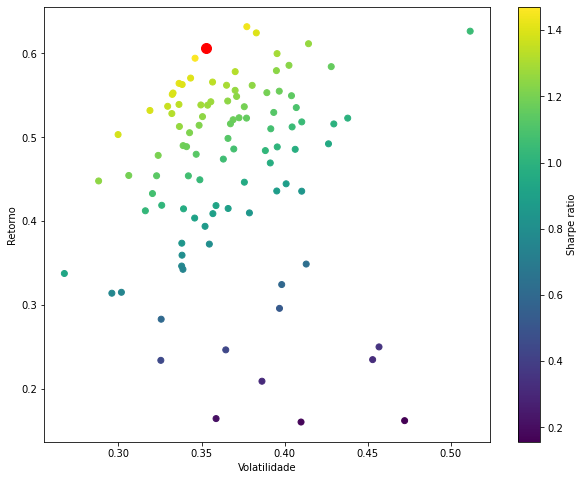

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(ls_volatilidade, ls_retorno, c=ls_sharpe_ratio)
plt.colorbar(label='Sharpe ratio')
plt.xlabel('Volatilidade')
plt.ylabel('Retorno')
plt.scatter(melhor_volatilidade, melhor_retorno, c='red', s=100);

fronteira eficiente: retorno alto (lucro), volatilidade baixa (risco)

## Otimização de portfólio com algoritmos de otimização

- Biblioteca mlrose: https://mlrose.readthedocs.io/en/stable/

In [ ]:
!pip install mlrose

In [ ]:
import mlrose

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).



In [ ]:
taxa_selic_historico

array([12.75, 14.25, 12.25,  6.5 ,  5.  ,  2.  ])

In [ ]:
dataset_original = pd.read_csv('acoes.csv')
dinheiro_total = 5000
sem_risco = taxa_selic_historico.mean() / 100

N = len(dataset_original.columns) - 1

In [ ]:
# cost function
def fitness_function(solucao):
  dataset = dataset_original.copy()
  pesos = solucao / solucao.sum()

  # normalizar
  for i in dataset.columns[1:]:
    dataset[i] = (dataset[i] / dataset[i][0])

  for i, acao in enumerate(dataset.columns[1:]):
    dataset[acao] = dataset[acao] * pesos[i] * dinheiro_total

  dataset.drop(columns=['Date'], inplace=True)
  dataset['soma valor'] = dataset.sum(axis = 1)
  dataset['taxa retorno'] = 0.0

  for i in range(1, len(dataset)):
    dataset['taxa retorno'][i] = ((dataset['soma valor'][i] / 
                                   dataset['soma valor'][i-1]) - 1) * 100

  sharpe_ratio = (dataset['taxa retorno'].mean() - sem_risco) / (
      dataset['taxa retorno'].std()) * np.sqrt(days_bolsa)

  return sharpe_ratio

In [ ]:
np.random.seed(10)
pesos = np.random.random(N)
pesos = pesos / pesos.sum()
pesos

array([0.26617196, 0.00716121, 0.21866313, 0.25840174, 0.17202779,
       0.07757418])

In [ ]:
fitness_function(pesos)

1.0086588476187113

In [ ]:
def visualiza_alocacao(arr):
    return dict(zip(dataset_original.columns[1:], arr*100))

In [ ]:
visualiza_alocacao(pesos)

{'BOVA': 7.757417520619242,
 'CVC': 0.7161207195395352,
 'GOL': 26.617195545614496,
 'MGLU': 25.84017365648649,
 'TOTS': 17.202779081759033,
 'WEGE': 21.866313475981215}

In [ ]:
fitness = mlrose.CustomFitness(fitness_function)

In [ ]:
%%time
problema_maximizacao = mlrose.ContinuousOpt(
    length=N,
    fitness_fn=fitness,
    maximize=True,
    min_val=0,
    max_val=1
    )

CPU times: user 49 µs, sys: 2 µs, total: 51 µs
Wall time: 57 µs


In [ ]:
%%time
problema_minimizacao = mlrose.ContinuousOpt(
    length=N,
    fitness_fn=fitness,
    maximize=False,
    min_val=0,
    max_val=1
    )

CPU times: user 45 µs, sys: 2 µs, total: 47 µs
Wall time: 51 µs


### Hill climb

In [ ]:
%%time
melhor_solucao, melhor_custo = mlrose.hill_climb(
    problema_maximizacao,
    random_state=1
    )
melhor_solucao, melhor_custo

CPU times: user 32.7 s, sys: 6.11 ms, total: 32.7 s
Wall time: 32.8 s


In [ ]:
melhor_solucao = melhor_solucao / melhor_solucao.sum()
melhor_solucao, melhor_solucao.sum()

(array([0.        , 0.18018453, 0.08187497, 0.7379405 , 0.        ,
        0.        ]), 0.9999999999999999)

In [ ]:
dct_acoes = visualiza_alocacao(melhor_solucao)
dct_acoes

{'BOVA': 0.0,
 'CVC': 18.018452678413226,
 'GOL': 0.0,
 'MGLU': 73.79405033978236,
 'TOTS': 0.0,
 'WEGE': 8.187496981804403}

In [ ]:
_, _, _, soma_valor = alocacao_ativos(
    pd.read_csv('acoes.csv'),
    investimento_inicial,
    melhores_pesos=melhor_solucao
    )
soma_valor

409188.0243303448

In [ ]:
%%time
pior_solucao, pior_custo = mlrose.hill_climb(
    problema_minimizacao,
    random_state=1
    )
pior_solucao, pior_custo

CPU times: user 32.4 s, sys: 2.83 ms, total: 32.4 s
Wall time: 32.4 s


In [ ]:
pior_solucao = pior_solucao / pior_solucao.sum()
pior_solucao

array([0.        , 0.25434307, 0.        , 0.        , 0.11652666,
       0.62913026])

In [ ]:
visualiza_alocacao(pior_solucao)

{'BOVA': 62.91302640049692,
 'CVC': 25.43430730965815,
 'GOL': 0.0,
 'MGLU': 0.0,
 'TOTS': 11.652666289844934,
 'WEGE': 0.0}

In [ ]:
_, _, _, soma_valor = alocacao_ativos(
    pd.read_csv('acoes.csv'),
    investimento_inicial,
    melhores_pesos=pior_solucao
    )
soma_valor

10347.314982869726

### Simulated annealing

Têmpera simulada: aquecer metal e esfriar lentamente

In [ ]:
%%time
melhor_solucao, melhor_custo = mlrose.simulated_annealing(
    problema_maximizacao,
    random_state=1
    )
melhor_solucao = melhor_solucao / melhor_solucao.sum()
melhor_solucao, melhor_custo

CPU times: user 2min 17s, sys: 22.4 ms, total: 2min 17s
Wall time: 2min 17s


In [ ]:
visualiza_alocacao(melhor_solucao)

{'BOVA': 0.0,
 'CVC': 18.181818181818183,
 'GOL': 0.0,
 'MGLU': 72.72727272727273,
 'TOTS': 0.0,
 'WEGE': 9.090909090909092}

In [ ]:
_, _, _, soma_valor = alocacao_ativos(
    pd.read_csv('acoes.csv'),
    investimento_inicial,
    melhores_pesos=melhor_solucao
    )
soma_valor

403670.53834024916

### Algoritmo genético

In [ ]:
problema_maximizacao_ag = mlrose.ContinuousOpt(
    length=N,
    fitness_fn=fitness,
    maximize=True,
    min_val=0.1,
    max_val=1
    )

In [ ]:
%%time
melhor_solucao, melhor_custo = mlrose.genetic_alg(
    problema_maximizacao_ag,
    pop_size=200,
    mutation_prob=0.1,
    max_attempts=10,
    # max_iters=inf,
    curve=False,
    random_state=1
    )
melhor_solucao = melhor_solucao / melhor_solucao.sum()
melhor_solucao, melhor_custo

CPU times: user 8min 43s, sys: 112 ms, total: 8min 43s
Wall time: 8min 44s


In [ ]:
visualiza_alocacao(melhor_solucao)

{'BOVA': 8.904445870929361,
 'CVC': 14.78983821364964,
 'GOL': 6.676964636972375,
 'MGLU': 48.79897006875947,
 'TOTS': 12.285954027081361,
 'WEGE': 8.543827182607789}

In [ ]:
_, _, _, soma_valor = alocacao_ativos(
    pd.read_csv('acoes.csv'),
    investimento_inicial,
    melhores_pesos=melhor_solucao
    )
soma_valor

274955.26105222595

## Exercício

In [ ]:
acoes_ex = ['ABEV3.SA', 'ODPV3.SA', 'VIVT3.SA', 'PETR3.SA', 'BBAS3.SA', 'BOVA11.SA']
acoes_ex_df = pd.DataFrame()
for acao in acoes_ex:
  acoes_ex_df[acao] = data.DataReader(acao, data_source='yahoo', start='2015-01-01')['Close']
acoes_ex_df.dropna(inplace=True)
acoes_ex_df = acoes_ex_df.rename(columns={
    'ABEV3.SA': 'AMBEV', 'ODPV3.SA': 'ODONTOPREV', 'VIVT3.SA': 'VIVO',
    'PETR3.SA': 'PETROBRAS', 'BBAS3.SA': 'BBRASIL', 'BOVA11.SA': 'BOVA'})
acoes_ex_df.to_csv('acoes_ex.csv')

In [ ]:
dataset_original = pd.read_csv('acoes_ex.csv')
dinheiro_total = 5000
sem_risco = taxa_selic_historico.mean() / 100
dataset_original

,Date,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BBRASIL,BOVA
0,2015-01-02,16.020000,9.37,37.820000,9.000000,22.650000,47.259998
1,2015-01-05,15.730000,9.62,37.070000,8.270000,22.180000,46.320000
2,2015-01-06,16.330000,9.55,36.150002,8.060000,22.490000,46.580002
3,2015-01-07,16.559999,9.69,37.389999,8.450000,23.480000,48.150002
4,2015-01-08,16.540001,9.66,38.910000,9.020000,23.559999,48.509998
...,...,...,...,...,...,...,...
1498,2021-01-22,15.030000,14.25,44.070000,27.700001,33.419998,113.180000
1499,2021-01-26,15.400000,14.35,44.830002,27.600000,32.790001,112.970001
1500,2021-01-27,15.400000,14.18,45.660000,27.980000,33.750000,112.970001
1501,2021-01-28,15.540000,14.53,45.709999,28.600000,34.540001,113.910004


In [ ]:
%%time
sharpe_ratio, melhores_pesos, _, _, _, _, _ = alocacao_portfolio(
    dataset_original,
    dinheiro_total, 
    taxa_selic_historico.mean() / 100, 
    repeticoes=1000)
sharpe_ratio

CPU times: user 2min, sys: 22 ms, total: 2min
Wall time: 2min


In [ ]:
_, _, acoes_pesos, soma_valor = alocacao_ativos(
    pd.read_csv('acoes_ex.csv'),
    dinheiro_total,
    melhores_pesos=melhores_pesos
    )
acoes_pesos, soma_valor

(        Ações      Pesos
 0       AMBEV   7.584935
 1  ODONTOPREV   4.620554
 2        VIVO   4.153315
 3   PETROBRAS  32.516875
 4     BBRASIL   2.292012
 5        BOVA  48.832309, 11856.64874878564)

In [ ]:
%%time
melhor_solucao, melhor_custo = mlrose.hill_climb(
    problema_maximizacao,
    random_state=1
    )
melhor_solucao = melhor_solucao / melhor_solucao.sum()
print(melhor_custo)
visualiza_alocacao(melhor_solucao)

0.20651582166039062
CPU times: user 36.5 s, sys: 8.83 ms, total: 36.5 s
Wall time: 36.5 s


In [ ]:
_, _, _, soma_valor = alocacao_ativos(
    pd.read_csv('acoes_ex.csv'),
    dinheiro_total,
    melhores_pesos=melhores_pesos
)
soma_valor

11856.64874878564

In [ ]:
%%time
melhor_solucao, melhor_custo = mlrose.simulated_annealing(
    problema_maximizacao,
    random_state=1
    )
melhor_solucao = melhor_solucao / melhor_solucao.sum()
print(melhor_custo)
visualiza_alocacao(melhor_solucao)

0.1464634759533205
CPU times: user 1min 46s, sys: 14 ms, total: 1min 46s
Wall time: 1min 46s


In [ ]:
_, _, _, soma_valor = alocacao_ativos(
    pd.read_csv('acoes_ex.csv'),
    dinheiro_total,
    melhores_pesos=melhor_solucao
)
soma_valor

14549.733809116704

In [ ]:
%%time
melhor_solucao, melhor_custo = mlrose.genetic_alg(
    problema_maximizacao_ag,
    random_state=1
    )
melhor_solucao = melhor_solucao / melhor_solucao.sum()
print(melhor_custo)
visualiza_alocacao(melhor_solucao)

-0.10937267998104844
CPU times: user 4min 54s, sys: 42 ms, total: 4min 54s
Wall time: 4min 55s


In [ ]:
_, _, _, soma_valor = alocacao_ativos(
    pd.read_csv('acoes_ex.csv'),
    dinheiro_total,
    melhores_pesos=melhor_solucao)
soma_valor

10432.299662382236